In [20]:
import os
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from omnixai.data.tabular import Tabular

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
train = pd.read_csv('../data/current-dataset/train-feature-customsplit.csv', delimiter=",",index_col=0)
test = pd.read_csv('../data/current-dataset/test-feature-customsplit.csv', delimiter=",",index_col=0)
X_train = train.drop(columns='label')
y_train = train['label']
X_test = test.drop(columns='label')
y_test = test['label']

In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import to_categorical

feature_names = list(X_train.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(train.label.copy())
class_names = label_encoder.classes_

In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = mlp.predict(X_test)

print(classification_report(y_pred, y_test))

c:\Users\miquel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

        Bike       0.62      0.51      0.56       552
         Bus       0.78      0.75      0.77      4302
         Car       0.96      0.85      0.90      4471
       Metro       0.83      0.84      0.83      3789
        Moto       0.80      0.72      0.76       620
         Run       0.95      0.96      0.95       713
  Stationary       0.14      0.34      0.20       496
       Train       0.12      0.14      0.13       659
        Tram       0.90      0.79      0.84      3010
        Walk       0.78      0.90      0.84      2366
      e-Bike       0.51      0.43      0.47        90
   e-Scooter       0.80      0.72      0.76       754

    accuracy                           0.78     21822
   macro avg       0.68      0.66      0.67     21822
weighted avg       0.81      0.78      0.79     21822



              precision    recall  f1-score   support

        Bike       0.62      0.51      0.56       552
         Bus       0.78      0.75      0.77      4302
         Car       0.96      0.85      0.90      4471
       Metro       0.83      0.84      0.83      3789
        Moto       0.80      0.72      0.76       620
         Run       0.95      0.96      0.95       713
  Stationary       0.14      0.34      0.20       496
       Train       0.12      0.14      0.13       659
        Tram       0.90      0.79      0.84      3010
        Walk       0.78      0.90      0.84      2366
      e-Bike       0.51      0.43      0.47        90
   e-Scooter       0.80      0.72      0.76       754

    accuracy                           0.78     21822
   macro avg       0.68      0.66      0.67     21822
weighted avg       0.81      0.78      0.79     21822



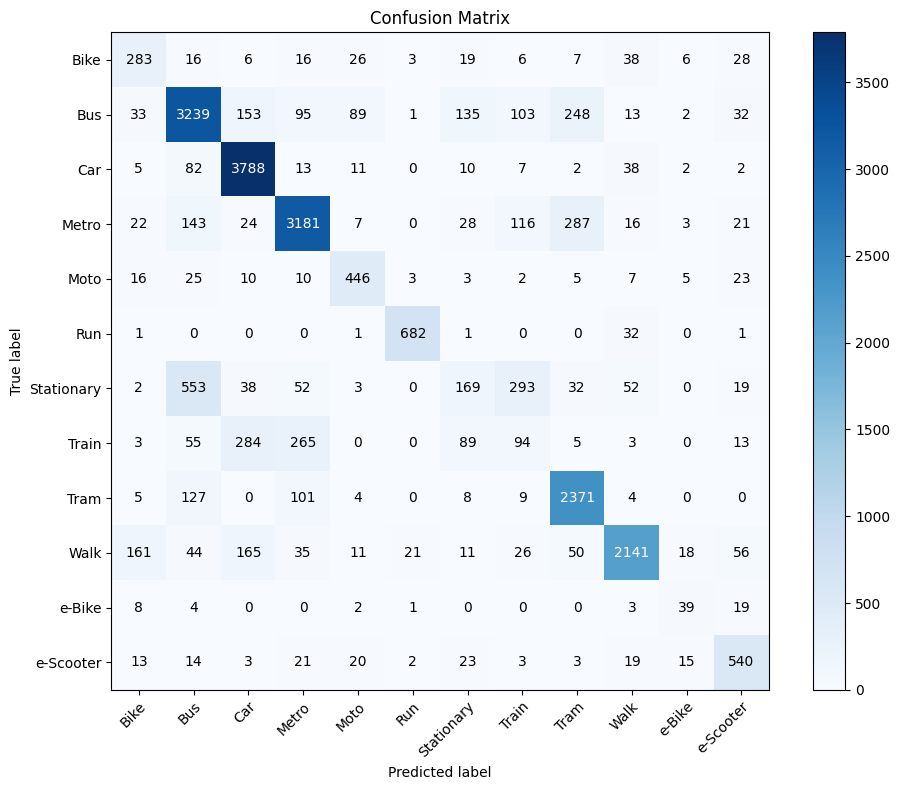

In [28]:
import sys  
sys.path.insert(0, '../src/')
import metrics as mt
print(classification_report(y_pred, y_test))
mt.plot_confusion_matrix(y_test,y_pred)

In [36]:
from sklearn.model_selection import RandomizedSearchCV


# Hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(512,256,128)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# RandomForest model
mlp = MLPClassifier(max_iter=600)

#takes 1 hour to converge
# mlp = MLPClassifier(max_iter=1000)

# Random search with cross-validation
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=11)
random_search.fit(X_train,y_train)

# Best parameters and model
best_mlp = random_search.best_estimator_

# Validate the performance
y_predi = best_mlp.predict(X_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [37]:
random_search.best_params_

{'solver': 'sgd',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (100,),
 'alpha': 0.05,
 'activation': 'relu'}

In [39]:
best_mlp.get_params

<bound method BaseEstimator.get_params of MLPClassifier(alpha=0.05, learning_rate='adaptive', max_iter=1000, solver='sgd')>

              precision    recall  f1-score   support

        Bike       0.54      0.57      0.56       431
         Bus       0.79      0.85      0.82      3856
         Car       0.95      0.85      0.90      4417
       Metro       0.86      0.80      0.83      4124
        Moto       0.74      0.74      0.74       557
         Run       0.97      0.97      0.97       717
  Stationary       0.19      0.38      0.26       606
       Train       0.10      0.08      0.09       969
        Tram       0.84      0.82      0.83      2697
        Walk       0.87      0.90      0.88      2635
      e-Bike       0.32      0.62      0.42        39
   e-Scooter       0.79      0.69      0.73       774

    accuracy                           0.79     21822
   macro avg       0.66      0.69      0.67     21822
weighted avg       0.80      0.79      0.79     21822



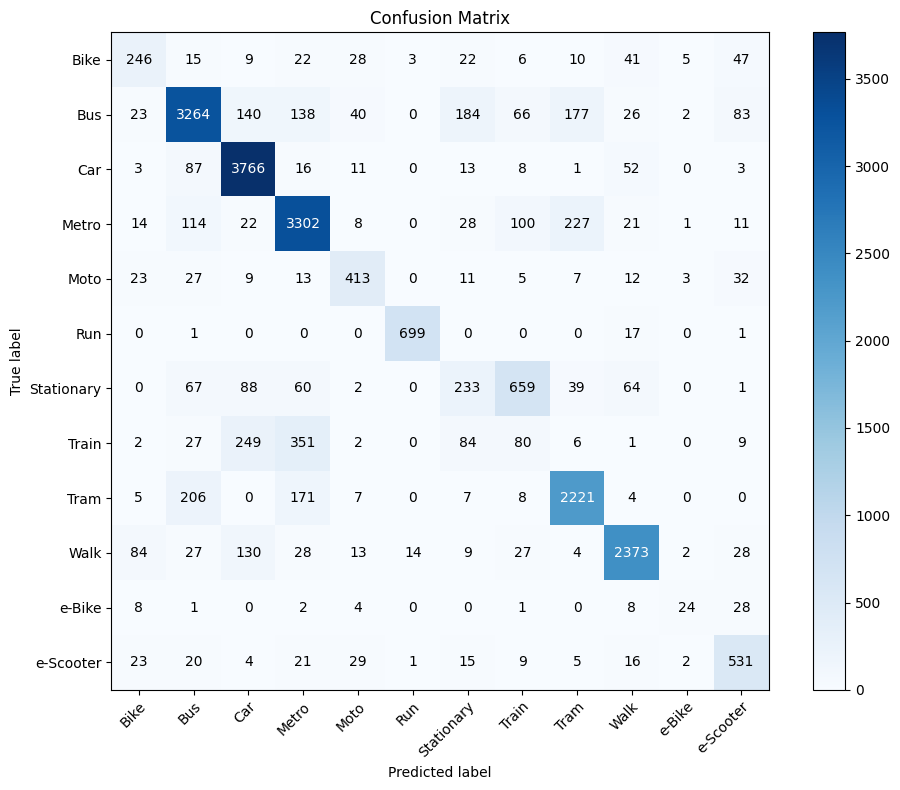

In [38]:
import sys  
sys.path.insert(0, '../src/')
import metrics as mt
print(classification_report(y_predi, y_test))
mt.plot_confusion_matrix(y_test,y_predi)